<h1 style="text-align: center;">COE in Singapore: studying public sentiment to the policy and its contributory effect to government revenue</h1>
<br><br>
<h2>1. Abstract</h2>
<p>
The COE or Certificate of Entitlement is a policy in Singapore designed to curb vehicle ownership by increasing the cost of owning a motor vehicle. It has generated concerns amongst the public after it increased beyond SGD 100,000 - in most cases surpassing the actual cost of the vehicle. This analysis studies the potential revenue the COE policy generates and the affect in government news based off the price increases.
</p>
<h2>2. Introduction</h2>
<p>
Singapore is a small island country measuring 735.6 km<sup>2</sup> - about 1.2 times the size of London. To manage traffic congestion, strict policies are set to manage the number of motor vehicles in the city. The most prominent is the COE (Certificate of Entitlement) which functions as a license that entitles its owner to the right to register, own, and use a vehicle. 
<br><br>
COE prices have successfully crossed the SGD 100,000 mark in the past 2 years, causing an increased volume of media coverage. However, officials rarely comment on COE prices and its revenue generating capability is rarely highlighted. Public speculation continues to persist that COE prices may be moderated by an increase in the total number of available COEs. This would address the major reasons for the price increase: an increased population, higher demand for cars, and limited adjustment to the total number of COEs.
<br><br>
This analysis serves to explore the COE policy and its function as a rolling source of revenue for the Singapore government. It will also briefly analyse the sentiment of a local newspaper to posit the offical sentiment on the increased prices.
</p>

<h2>3. Aims and objectives</h2>
<p>
This goal of this analyis is to:
</p>
<ol>
    <li>Obtain a statistical understanding of the relationship between COE prices and COE quotas</li>
    <li>Obtain a statistical understanding of the change in COE prices from 2010 to 2024</li>
    <li>Measure the potential COE revenue from 2010 to 2024</li>
</ol>
<p>
During the analysis the following concepts will be used:
</p>
<ol>
    <li>Webscraping of data from open sources</li>
    <li>Webscraping of data from APIs</li>
    <li>Data cleaning and storage</li>
    <li>Data transformation and presentation</li>
    <li>Analysis using the Natural Language Toolkit</li>
</ol>


<h2>4. Background</h2>
<p>
The COE system is divided into 5 seperate categories with each category corresponding to a specific vehicle type:
<ul>
    <li>Category A: Non-fully electric cars with engines up to 1,600cc and Maximum Power Output up to 97kW (130bhp)</li>
    <li>Category A: Fully electric cars with Maximum Power Output up to 110kW (147bhp)</li>
    <li>Category B: Non-fully electric cars with engines above 1,600cc or Maximum Power Output above 97kW (130bhp)</li>
    <li>Category B: Fully electric cars with Maximum Power Output above 110kW (147bhp)</li>
    <li>Category C: Goods vehicles and bus</li>
    <li>Category D: Motorcycles</li>
    <li>Category E: Open – all except motorcycles</li>
</ul>
Potential vehicle owners place a bid on an uniform price auction that is held twice each month and successful bidders from within the same category pay the same price. The cost of each COE is called the COE premium. Each COE is tied to a vehicle and is not transferrable. The COE is valid for 10 years, and at the end of its validity, the vehicle owner must re-bid for a new COE or dispose of the vehicle. The total number of COEs - the vehicle quota - has not increased since 2018. The total number of vehicles in Singapore was 921,958 in 2010 and 947,704 in 2023 (Land Transport Authority, 2024).
</p>

<h2>5. Methodology and data used</h2>
<p>
Data is obtained from the following sources:
</p>
<table>
    <tr>
        <th>Source</th>
        <th>Data</th>
        <th>Method</th>
        <th>Permissions</th>
        <th>Link</th>
    </tr>
    <tr>
        <td>data.gov.sg</td>
        <td>COE data</td>
        <td>API</td>
        <td>User canuse, access, download, copy, distribute, transmit, modify and adapt the datasets, or any derived analyses or applications, whether commercially or non-commercially. The user cannot use the data in a way that suggests official status or endorsement.
</td>
        <td><a href="https://data.gov.sg/datasets/d_69b3380ad7e51aff3a7dcc84eba52b8a/view">Click</a></td>
    </tr>
    <tr>
        <td>Channel News Asia</td>
        <td>COE articles</td>
        <td>Beautiful Soup</td>
        <td>No specific prohibitions were stated regarding the use of scrapers or crawlers. It is mentioned that the crawl-delay should be a minimum of 10.</td>
        <td><a href="https://www.channelnewsasia.com/robots.txt">Click</a></td>
    </tr>
    <tr>
        <td>International Monetary Fund</td>
        <td>Financial</td>
        <td>CSV file</td>
        <td>The IMF allows free non-systematic downloading of conent for personal, noncommercial usage. Fair use is defined as the excerption or quoting of content by individuals (e.g. students) for noncommercial purposes such as criticism, comment, news reporting, teaching, scholarship, or research for up to 1000 words or no more than one-quarter of the content.</td>
        <td><a href="https://www.imf.org/en/Publications/WEO/weo-database/2024/April/select-country-group">Click</a></td>
    </tr>
</table>
<p>
The data sources are chosen for 3 main reasons. Firstly, they provide governmental or organisational datapoints that are considered reliable and that can be fact-checked against other sources. For example, the potentnial revenue calculated from COE data will be checked against the numbers submitted by the Ministry of Finance in a paper source.
    
Secondly, all of the selected sources not not oppose the use of the data for purposes of this study. This means that there are no breaches in their fair use policy and that there are no ethical dilemmas in how data is obtained. The creation of new intellectual property for non-commercial purposes is allowed using the data sources. There are also no privacy issues, since all of the data obtained is publicy available.

Lastly, the sources provide data points in 3 separate methods (API, .CSV, scraping). To support this operation, several libraries are imported to enable data acquisition. These include json to handle json data and beautiful soup to scrape information from the news website. After data is obtained from various sources other libraries such as matplotlib and NLTK, are used in the display of data and sentiment analysis respectively. The full list of libraries is displayed below.
</p>

In [1]:
# IMPORT LIBRARIES

import pandas as pd
import requests
import numpy as np
import json
import csv
import urllib
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.units as munits
import seaborn as sns
from wordcloud import WordCloud

from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JJ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<p>
The first piece of data is sourced from the local government data office. Called data.gov.sg, the office holds and statistics submitted by various government ministries including the Land Transport Authority. The office encourages users to obtain data via an API and this study does so accordingly. A copy of the original data pulled is included within this notebook's folder. In the event that it is not accesible, the code below also includes instructions to conduct another pull of data from the site.  
</p>

In [2]:
# GET DATASET 1 USING OPENAPI QUERY

# check if json document is available first
filename = "dataset1.json"
dataset_id = "d_69b3380ad7e51aff3a7dcc84eba52b8a"
url = f"https://data.gov.sg/api/action/datastore_search?resource_id={dataset_id}&limit=2000"

if (os.path.exists(filename)):
    f = open(filename, "r")
    records = json.load(f)
    print(filename, "loaded")

# if there is no json document, then pull data directly from server with url and id    
else:
    response = requests.get(url)
    
    if response.status_code == 200:
        try :
            # receive json response from server
            data = response.json()
            
            # identify headers and records in the response
            records = data.get('result', {}).get('records', [])

            # save json to file
            with open(filename, "w", encoding = "utf-8") as f:
                json.dump(records, f)
                print("Data pulled from server, written to file:", filename)

        except:
            print("DataSet1 connection error:", response.status_code)


dataset1.json loaded


<h2>6. Results</h2>

<h3>6.1 High-level observations</h3>

After the data is extracted, a new dataframe is created for each Category of COEs that will contain its month, Category, and premium.
    
A description of each dataframe is pushed to get a high-level understanding of the data that has been pulled from the government site. It is observed that the original data is well formatted and does not contain empty fields. This is reflected in the consistent number of entries in each category, 354, over the same period of 14 years.

It is also observed that premiums for the COEs have significantly varied low and high premium. The difference is most pronounced for Category B COEs with a min of \\$19,190 and a max of \\$150,001 - a 781% increase. The data suggests that this may not be caused by a small group of outliers, with the standard deviation of each category coming close to half of its mean.

Another observation is that the general distribution of COE premiums in Category E mirrors that of Category B. Category E COEs hold only minor increases in mean (1.84%), standard deviation (2.04%), min (3.64%), max (5.34%) when compared to their Category B counterparts. This suggests that although Category E COEs are usable by all types of vehicles, they are still largely used to stem overflow of demand for large cars in Category B. Note also that the mean for Category D is significantly lower than all other categories, reflecting the lower value of motorcycles when compared to other vehicle types. 

In [3]:
# convert to pandas object
df1 = pd.DataFrame(records)

# narrow the data to show only the cost (premium) of COEs and the corresponding categories
df1_premium = pd.DataFrame(records, columns = ["month", "vehicle_class", "premium"])

# create new dataframe for category A (small cars), convert the str to float, then find mean across 15 years
df_CatA = df1_premium.loc[(df1_premium['vehicle_class'] == "Category A")].copy()
df_CatA["premium_int"] = pd.to_numeric(df_CatA["premium"], errors='coerce')
print("Category A:",round(df_CatA["premium_int"].describe(),2))

# create new dataframe for category B (large cars), convert the str to float, then find mean across 15 years
df_CatB = df1_premium.loc[(df1_premium['vehicle_class'] == "Category B")].copy()
df_CatB["premium_int"] = pd.to_numeric(df_CatB["premium"], errors='coerce')
print("Category B:",round(df_CatB["premium_int"].describe(),2))

# create new dataframe for category C (goods vehicles and buses), convert the str to float, then find mean across 15 years
df_CatC = df1_premium.loc[(df1_premium['vehicle_class'] == "Category C")].copy()
df_CatC["premium_int"] = pd.to_numeric(df_CatC["premium"], errors='coerce')
print("Category C:",round(df_CatC["premium_int"].describe(),2))

# create new dataframe for category D (motorcycles), convert the str to float, then find mean across 15 years
df_CatD = df1_premium.loc[(df1_premium['vehicle_class'] == "Category D")].copy()
df_CatD["premium_int"] = pd.to_numeric(df_CatD["premium"], errors='coerce')
print("Category D:",round(df_CatD["premium_int"].describe(),2))

# create new dataframe for category E (open), convert the str to float, then find mean across 15 years
df_CatE = df1_premium.loc[(df1_premium['vehicle_class'] == "Category E")].copy()
df_CatE["premium_int"] = pd.to_numeric(df_CatE["premium"], errors='coerce')
print("Category E:",round(df_CatE["premium_int"].describe(),2))

Category A: count       354.00
mean      56868.87
std       21342.57
min       18502.00
25%       40030.75
50%       53362.00
75%       72349.25
max      106000.00
Name: premium_int, dtype: float64
Category B: count       354.00
mean      67962.34
std       26827.98
min       19190.00
25%       46574.00
50%       62800.00
75%       85164.50
max      150001.00
Name: premium_int, dtype: float64
Category C: count      354.00
mean     47349.74
std      16730.85
min      19001.00
25%      32523.25
50%      46368.00
75%      57092.25
max      91101.00
Name: premium_int, dtype: float64
Category D: count      354.00
mean      5664.04
std       3258.91
min        852.00
25%       2262.25
50%       5996.50
75%       8007.00
max      13189.00
Name: premium_int, dtype: float64
Category E: count       354.00
mean      69215.86
std       27374.50
min       19889.00
25%       47854.75
50%       64900.50
75%       87000.75
max      158004.00
Name: premium_int, dtype: float64


<h3>6.2 Trend lines</h3>

Using the dataframes created above, the prices of each COE category can be visualised in a line graph against time. To increase clarity, the labels on the X-axis have been altered to only reflect 5-year intervals. The graphs show a general trend where prices of COEs follow a consistent trend line and suggests that market demand is driven by a large force that alters demand irrespective of vehicle type.

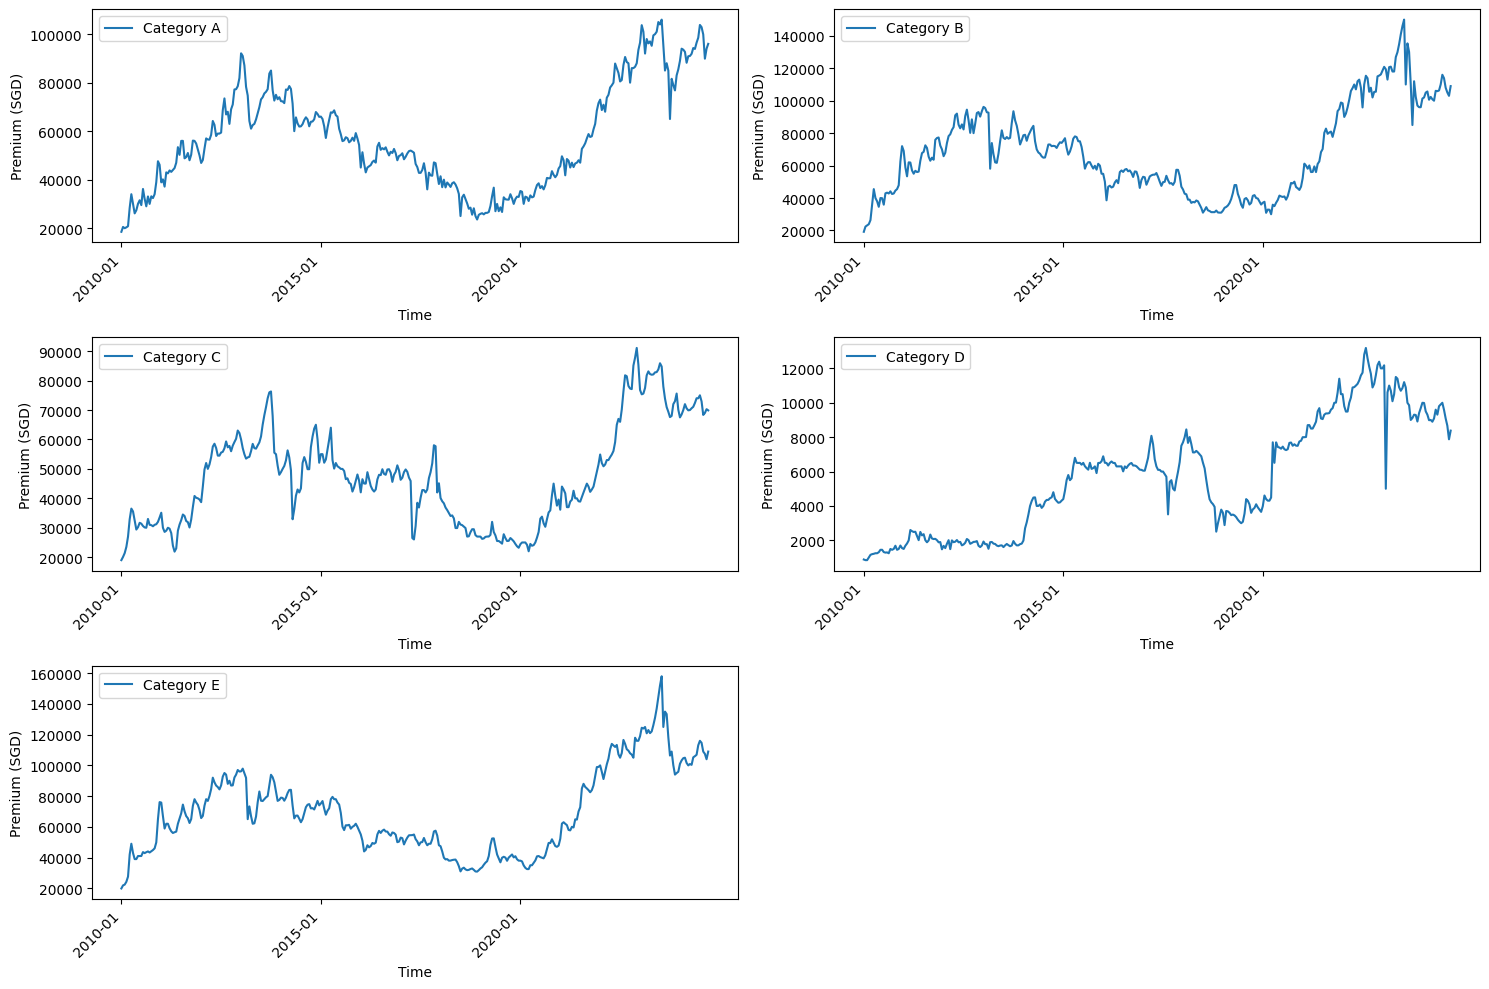

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# function to plot a subplot
def plot_subplot(df, ax, label):
    # Plot the graph
    df.plot(x='month', y='premium_int', ax=ax, label=label)

    # Set x-axis labels at intervals
    interval = 120  # Interval for x-axis labels
    label_indices = list(range(0, len(df['month']), interval))
    ax.set_xticks(label_indices)
    ax.set_xticklabels(df['month'].iloc[label_indices], rotation=45, ha='right')

    # Set axis labels (optional customization)
    ax.set_xlabel("Time")
    ax.set_ylabel("Premium (SGD)")

# call the function for each catefoty
plot_subplot(df_CatA, axs[0, 0], label='Category A')
plot_subplot(df_CatB, axs[0, 1], label='Category B')
plot_subplot(df_CatC, axs[1, 0], label='Category C')
plot_subplot(df_CatD, axs[1, 1], label='Category D')
plot_subplot(df_CatE, axs[2, 0], label='Category E')

# remove extra plot
fig.delaxes(axs[2, 1])

# prevent overlapping of subplot labels
plt.tight_layout()
plt.show()

<p>
To check the validity of the earlier statement, the premiums of all vehicle categories are overlayed on the same line graph below. The results show that categories A, B, C, and E follow the same general trend line. This trend follows a line that peaks in 2012 followed by a slow decline to a trough in 2019 before rising to the maximum high in 2024.
<br><br>    
It is to be noted that the Category D (motorcycles) is the only category of vehicles that does not strictly follow this trend. Instead, the COE premiums follow a generally increasing price trend. This may reflect the lower value of motorcyles. A trough similar to the other categies however, can still be observed in 2019.
<br><br>
Before any conclusions can be drawn, it is also apt to consider the effect of demand and competition on prices. Since the total number of COEs are regulated by the government, the number of COEs available for purchase at each auction depends two factors: (1) the number of COEs avilable (2) the number of bids and the implicit market demand for COEs at auction.  
<br><br>
</p>

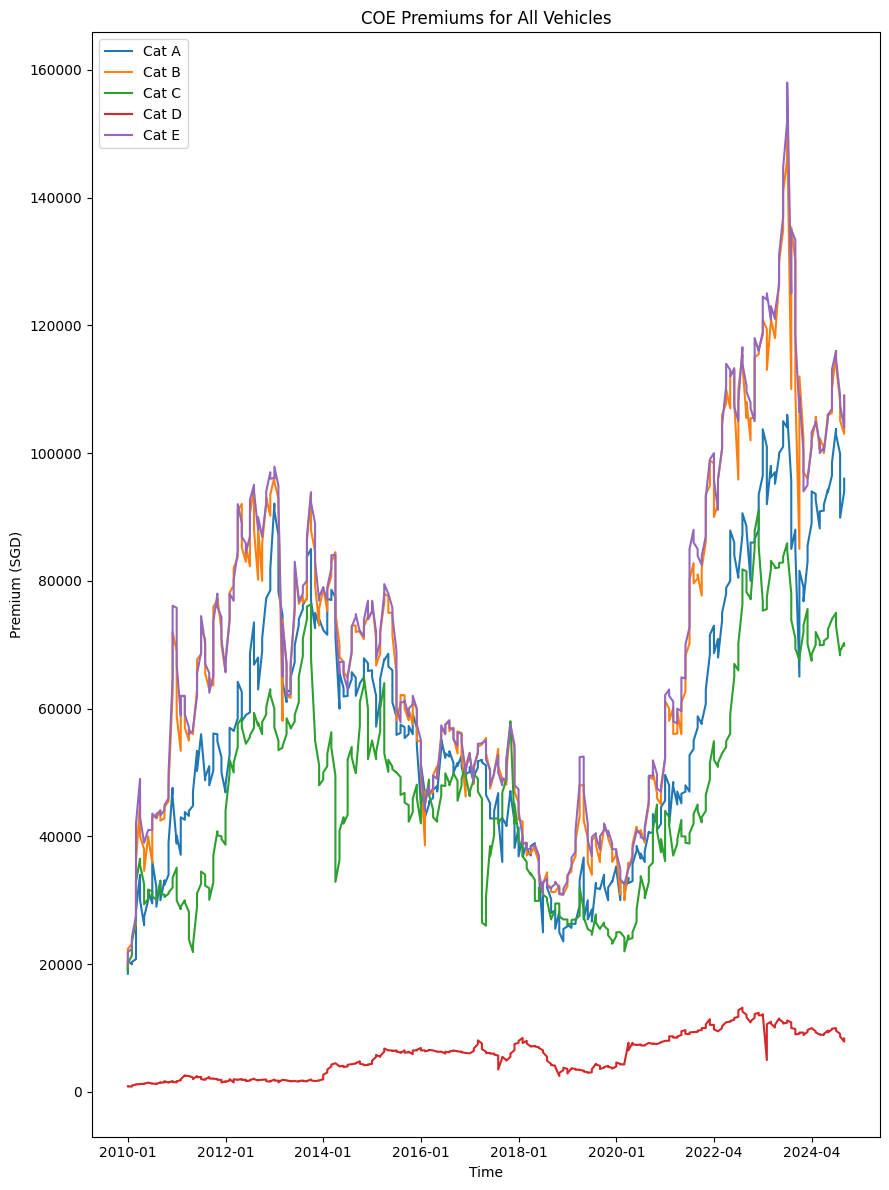

In [5]:
# create the plot
plt.figure(figsize=(9, 12))

# add the lines
plt.plot(df_CatA["month"], df_CatA['premium_int'], label='Cat A')
plt.plot(df_CatB["month"], df_CatB['premium_int'], label='Cat B')
plt.plot(df_CatC["month"], df_CatC['premium_int'], label='Cat C')
plt.plot(df_CatD["month"], df_CatD['premium_int'], label='Cat D')
plt.plot(df_CatE["month"], df_CatE['premium_int'], label='Cat E')

# creating intervals between x-axis labels (so there won't be a thousand entries)
plt.xticks(df_CatA['month'][::48]) 

# labels
plt.xlabel("Time")
plt.ylabel("Premium (SGD)")
plt.title("COE Premiums for All Vehicles")

# show plot
plt.tight_layout()
plt.legend()
plt.show()

<h3>6.3 The pool of available COEs</h3>
<p>
In the code below, four items are counted: the number of available COEs that are up for purchase each month, the number of bids received that month, the number of those bids that go on to be successful, and finally the cost of each COE (it's premium). The number of successful bids mirrors the COE quota meaning that all or almost all available COEs are bought at each auction. 

It is observed that the number of available COEs is largely steady between 2011 to 2014 but increases from 40,000 in 2014 to 100,000 in 2016. The next three years continue with an elevated number of available COEs but this begins to fall in 2020 and 2022. As a whole, an increase in COE availability supports a downward pressure in premiums.

There are several instances where the numbers of bids received rises, but this increase in demand does not consistently reflect a higher price. This suggests that market demand does not appear to be linked to the cost of COEs. Instead, demand decreases where COE premiums rise, possibly showing that individuals are unable to afford vehicles.
</p>

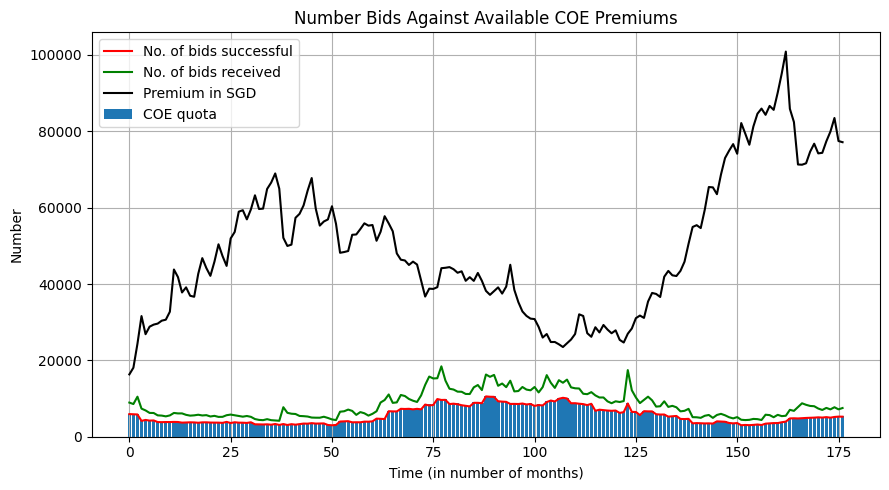

In [21]:
# start by converting the month column to date time format
df1["month"] = pd.to_datetime(df1["month"], format="%Y-%m")

def get_item_by_month(list_name, item, year):
    filtered_df = df1[df1["month"].dt.year == year]
    grouped_data = filtered_df.groupby(filtered_df["month"].dt.month)[item].apply(
        lambda x: pd.to_numeric(x, errors="coerce").sum()
    )
    for value in grouped_data:
        list_name.append(value)

# function that gets avg price per year (previous function cannot be used because it needs to be divided by the number of categories)
def get_avg_price_by_month(list_name, year):
    filtered_df = df1[df1["month"].dt.year == year]
    monthly_avg = filtered_df.groupby(filtered_df["month"].dt.month)["premium"].apply(
        lambda x: pd.to_numeric(x, errors="coerce").mean()
    )
    for value in monthly_avg:
        list_name.append(value)

# create lists to store data
yearly_quota = []
yearly_bids_successful = []
yearly_bids_received = []
avg_premium = []
index = []

# call the functions to get the data into the lists
start_year = 2010
for i in range(15):
    get_item_by_month(yearly_quota,"quota",start_year)
    get_item_by_month(yearly_bids_successful,"bids_success",start_year)
    get_item_by_month(yearly_bids_received,"bids_received",start_year)
    get_avg_price_by_month(avg_premium,start_year)
    start_year += 1

# to serve as an index so that we can make a bar chart
counting = 0
for i in range(len(yearly_quota)):
    index.append(int(counting))
    counting += 1

# create the plot
plt.figure(figsize=(9, 5))
plt.bar(index,yearly_quota, label = "COE quota")
plt.plot(yearly_bids_successful, label = "No. of bids successful", color = "red")
plt.plot(yearly_bids_received, label = "No. of bids received", color = "green")
plt.plot(avg_premium, label = "Premium in SGD", color = "black")

# labels
plt.xlabel("Time (in number of months)")
plt.ylabel("Number")
plt.title("Number Bids Against Available COE Premiums")

# Add gridlines
plt.grid(True) 

# show plot
plt.tight_layout()
plt.legend() 
plt.show()

<h3>6.4 Pair plot of data</h3>
<p>
Using a pair plot, the same data can be represented in a scatterplot. Two findings are interesting. First, there exists a substantial number of data points in plot [0,3] with instances of low quotas and low premiums. This contradicts the hypothesis that lower numbers of COEs drive up premium prices.
    
Second, datapoints in plot [1,3] run contrary to the suggestion that a high demand (high bids) would equate to high prices (high premiums). Since there are 0 instances of high bids and high premiums, this suggests that market demand does not appear be the main influence for the price of premiums. 
</p>

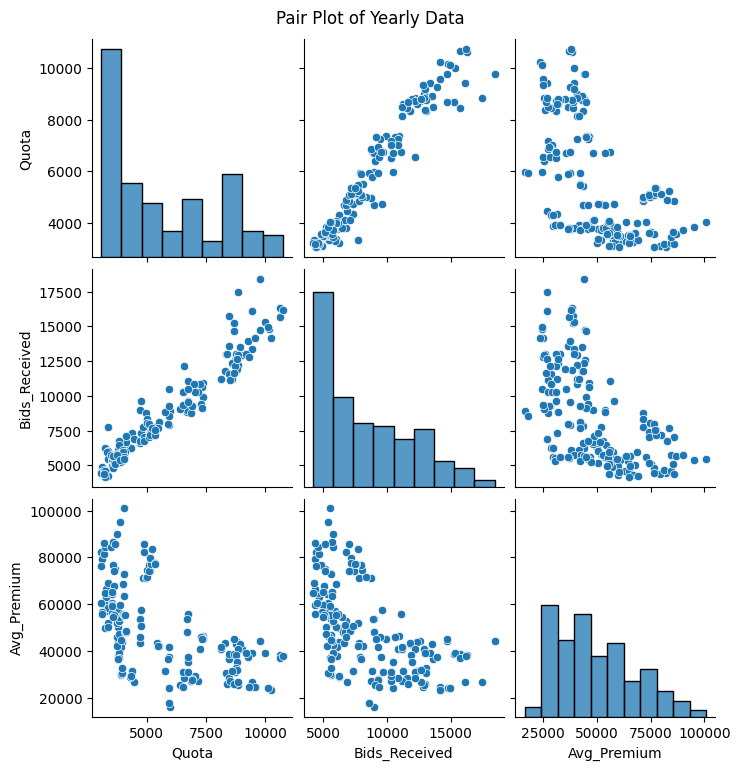

In [7]:
# add earlier dictionaries into a new dataframe
data = {
    "Year": index,
    "Quota": yearly_quota,
    "Bids_Received": yearly_bids_received,
    "Avg_Premium": avg_premium
}
df_seaborn = pd.DataFrame(data)

# create pair plot
sns.pairplot(df_seaborn, vars=["Quota", "Bids_Received", "Avg_Premium"], diag_kind="hist", kind="scatter")
plt.suptitle("Pair Plot of Yearly Data", y=1.02)
plt.show()


<h3>6.5 Total revenue from COEs</h3>
<p>
The formula to deduce the revenue that COE premiums generate can be described as (number of quotas in category for month) * (premium). When applied across the datafield using the for loop below, we receive a grand total of SGD 46,255,384,435. Of that amount, 10.19% or SGD 4,713,414,248 was acquired in 2024. This financial figure is largely in-line with the estimate of SGD 4,720,000,000 provided by the Ministry of Finance on 16 February 2024 (Ministry of Finance, 2024).
</p>

In [8]:
# total revenue calculation
total_revenue = 0

for row in range(len(df1)):
    total_revenue += int(df1["quota"][row]) * int(df1["premium"][row])

print("Total revenue across 15 years: ", total_revenue/1000000000, "(billion)")

# calculate revenue of last year
revenue_initial = 0

for row in range(len(df1)-120):
    revenue_initial += int(df1["quota"][row]) * int(df1["premium"][row])

revenue_last_year = total_revenue - revenue_initial

print("Total revenue for 2024: ", revenue_last_year/1000000000, "(billion)")
print("2024 revenue share: ", round(revenue_last_year/total_revenue*100,2), "%")

Total revenue across 15 years:  46.255384435 (billion)
Total revenue for 2024:  4.713414248 (billion)
2024 revenue share:  10.19 %


<h3>6.6 Statistical significance of COE revenue</h3>
<p>
To understand the statistical significance of SGD 4.7 billion in a country of less than 6 million citizens, this value can be compared to the total government budget. The latter data is extracted from the International Monetary Fund (IMF) via a .CSV file. In the code below, this data is taken from a CSV file downloaded from their page.
<br><br>
After cleaning the file and selecting the relevant data, the IMF's predicted government revenue for 2024 is SGD 83,000,000,000. Based on that data point, it is estimated that sale of COE premiums in 2024 contributed to at least 5.68% of the government's total revenue. This more than covers the country's spend on its Ministry of Social and Family Development. For an external comparision, France spent a comparative amount of SGD 4.8 billion on healthcare in 2023 (Statista, 2024).
</p>

In [9]:
# import from the csv file and create pandas df
WEO_df = pd.read_csv("WEO_Data0.csv")
# clean the NaN lines
WEO_df = WEO_df.dropna(thresh = 5)[-1:]
# select relevant data cell, convert the data into an int
WEO_df = (WEO_df["2024"])
WEO_df = int(WEO_df.iloc[0])
# convert data point to accurate number (it was divided by a billion in the csv)
total_government_revenue = WEO_df * 1000000000
# calculate share
percent_value = round(revenue_last_year / total_government_revenue * 100, 2)
print("Sale of COE premiums contributed to ", percent_value, "% of the total government budget (SGD", round(total_government_revenue), ")")

Sale of COE premiums contributed to  5.68 % of the total government budget (SGD 83000000000 )


<h3>6.7 Studying sentiment on COE policy</h3>
<p>
Although the government rarely comments on COE prices, their news agencies publish regular reports on the prices of premiums. They also feature  commentaries by experts and their opinions on COE policy.

Channel News Asia is the news agency with the highest local trust score of 74% (Reuters, 2024), and thus the chosen news agency for sentiment analysis. While not explicitly stated, a high trust score implies that locals trust the source to be reliable and less vulnerable to bias. This is an intentional consideration in the hope that the written sentiment of articles is moderated. Other news sites deemed trustworthy include the BBC at 64% and Yahoo News at 53%. 
    
Channel News Asia has webpage dedicated to COE content. This is the page scraped in the code below using beautiful soup. A list of scraped articles and their weblinks are returned. By examining the sentiment of these articles, it is hoped that government sentiment will be "leaked" and observable.
</p>

In [19]:
# soup function to get html and cookies of webpage
def get_soup(URL, jar = None):
    request_headers = {
        'update-insecure-requests' : '1',
        'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:50.0) Gecko/20100101 Firefox/50.0',
        'Accept' : 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Encoding' : 'gzip, deflate, br',
        'Accept-Language' : 'en-US,en;q=0.5'
    }
    if jar:
        r = requests.get(URL, cookies = jar, headers = request_headers)
    else:
        r = requests.get(URL, headers = request_headers)
        jar = requests.cookies.RequestsCookieJar()
    data = r.text
    soup = BeautifulSoup(data, 'html.parser')
    return soup, jar

# call soup function
soup, jar = get_soup("https://www.channelnewsasia.com/topic/coe")

# array to hold links
link_array = []

# get page links
def page_name(soup):
    for a in soup.find_all("a", class_ = "h6__link list-object__heading-link"):
        href = a.get("href")
        if href:
            link_array.append("https://www.channelnewsasia.com" + href)
    return link_array

# call function and check number of results
page_name(soup)

print("Number of articles analysed: ", len(link_array))
print("Article links: ",link_array)

Number of articles analysed:  15
Article links:  ['https://www.channelnewsasia.com/singapore/coe-premiums-bidding-exercise-dec-18-lta-4813656', 'https://www.channelnewsasia.com/singapore/traffic-public-transport-car-ownership-coes-congestion-under-control-year-ender-4811436', 'https://www.channelnewsasia.com/watch/deep-dive-will-more-coes-bring-prices-down-4804901', 'https://www.channelnewsasia.com/singapore/chee-hong-tat-transport-minister-erp-fares-coe-cars-4788726', 'https://www.channelnewsasia.com/singapore/coe-cat-cars-prices-bidding-exercise-4786226', 'https://www.channelnewsasia.com/watch/car-dealers-report-higher-footfall-showrooms-4779591', 'https://www.channelnewsasia.com/singapore/coe-category-cars-prices-fall-bidding-exercise-4759226', 'https://www.channelnewsasia.com/singapore/additional-coe-injections-vehicle-population-erp-distance-based-charging-4742851', 'https://www.channelnewsasia.com/podcasts/20000-certificate-entitlement-coe-car-prices-decrease-bring-car-prices-dow

<h3>6.8 Word cloud</h3>
<p>
By accumulating all of the words on the scraped webpages within a list, a frequency distribution can be done of the words published. After removing common stop words and branding names, there are a total of 6377 words used in the articles scraped of which 1388 are unique. The biggest results in the word cloud are "congestion" and "supply" reflecting common concerns (road congestion and supply of COEs) amongst vehicle owners in Singapore.
</p>

<FreqDist with 1387 samples and 6285 outcomes>


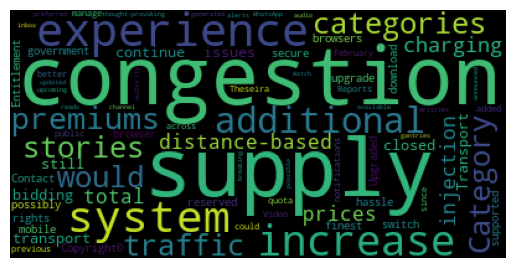

In [15]:
# list of all scaped words
scraped_words = [] 

for link in link_array:
    try:
        soup, jar = get_soup(link)
        for p in soup.find_all("p"):
            text = p.get_text(strip=True)
            if text:
                scraped_words.append(text)
    except Exception as e:
        print(f"Error processing {link}: {e}")  # Log the specific error
        continue

# list of tokenised words
tokenised_words = []

# tokenise all words
for items in scraped_words:
    tokenised_words = tokenised_words + nltk.word_tokenize(items)

# stop words and other words that should be filtered out (country name, news agency name)
stop_words = set(stopwords.words("english"))
exclude_words = ["singapore","Singapore", "mediacorp", "Mediacorp", "common", "which","vehicle","vehicles","exercise","years","20,000"]
all_exclude_words = stop_words.union(set(exclude_words))

# filter stop words out
filtered_tokenised_words = [word for word in tokenised_words if word.lower() not in all_exclude_words]

# carry out the frequency distribution
data_analysis = nltk.FreqDist(filtered_tokenised_words)
print(data_analysis)

# additional filter for words by length if needed
filtered_tokenised_words = dict([(m, n) for m,n in data_analysis.items() if len(m) > 4])

#generate word cloud
wcloud = WordCloud().generate_from_frequencies(filtered_tokenised_words)

plt.imshow(wcloud, interpolation = "kaiser")
plt.axis("off")
(-1.5, 200, 100, -2.5)
plt.show()

<h3>6.9 Sentiment analysis</h3>
<p>
A sentiment analysis is conducted using the full list of scraped words. The results in general show that Channel News Asia is largely neutral, with a tendency toward positive wording and avoidance of negative wording. 
    
The average sentiment of the words used is 0.17. This is considered fairly neutral by NLTK (NLTK, 2024) standards. A statistically different ratio in the number of positive, negative, and neutral words used was found. The number of positive words (248) outweighed the number of negative words (16) by 15.5 times. Taking into account the average score however, this suggests that although there were higher numbers of positive words, these words were not rated at the highest level of the positive scale.
</p>

Average score: 0.17
   pos  neg   neu
1  248   16  1808


Text(0.5, 1.0, 'Sentiment Analysis of News Website for Articles on COEs')

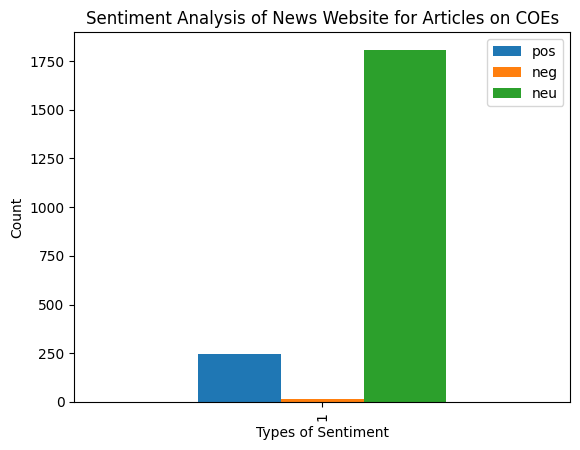

In [16]:
# create a sentiment analyser instance
sentim_analyzer = SentimentAnalyzer()

# list to hold the compound scores
compound_scores = []

# list to hold instances of positive, negative, neutral sentences
#pos_neg_neu_instances = {"pos" : 0, "neg" : 0, "neu" : 0}
pos_neg_neu_instances = pd.DataFrame({"pos" : 0, "neg" : 0, "neu" : 0}, index = [1])

# run sentiment analysis on sentences (not individual words)
for sentence in scraped_words:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        compound_scores.append(ss['compound'])

# calculate average score
average_score = sum(compound_scores) / len(compound_scores)
print("Average score:", round(average_score,2))

# calculate instances of positive, negative, and neutral scores (+-0.5 benchmark provided by Vader)
for score in compound_scores:
    if score > 0.5:
        pos_neg_neu_instances["pos"] += 1
    if score < -0.5:
        pos_neg_neu_instances["neg"] += 1
    else:
        pos_neg_neu_instances["neu"] += 1

print(pos_neg_neu_instances)

pos_neg_neu_instances.plot(kind = 'bar')
plt.xlabel("Types of Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis of News Website for Articles on COEs")

<h2>7. Limitations</h2>
<p>Accuracy considerations:</p>
<ul>
    <li>Sentiment analysis does not directly reflect the government's stance. Although data is scraped from government websites, some content is produced by individual authors who may, implicitly or otherwise, harbour their own sentiments. The results can this be indirect reference of a journalist's view.</li>
        <li>The sentiment analysis done may not be accurate as the most common words that appear in the word cloud are negative. This is in contrast to the number of negative sentiments which only number 16.</li>
    <li>This study does not consider the effect of inflation and its required dollar-value adjustments. Since values are taken at face value, there may be minor inaccuracies that affect the results.</li>
    <li>The financial records do not factor in the cost of revenue. This may come in the form such as the salaries of workers or overhead costs like the maintenance of the web pages.</li>
    <li>Correlation not equate to a relationship and unless a scientific study is done, relationships between the number of COEs and COE premiums cannot be assumed to be true.</li>
</ul>

<h2>9. Conclusion</h2>
<p>
COEs are an expensive form of control for the vehicle population in Singapore. It does not appear to temper demand for vehicle ownership as the COE quota always sells out irrespective of price. What the COE system does do is contribute a significant financial sum to government revenue that can be used to counter the concerns reflected in local news articles - congestion is one example. 
</p>

<h2>10. References</h2>

<p>
Channel News Asia (no date) <i>Coe.</i> Available at: https://www.channelnewsasia.com/topic/coe (Accessed: 30 December 2024).
<br>

Reuters (2024) <i>Digital News Report Singapore.</i> Available at: https://reutersinstitute.politics.ox.ac.uk/digital-news-report/2024/singapore (Accessed: 30 December 2024).

International Monetary Fund (2024) <i>World Economic Outlook database: April 2024.</i> Available at:<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.imf.org/en/Publications/WEO/weo-database/2024/April/weo-report? <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c=576%2C&s=NGDP_R%2CNGDPRPC%2CLP%2CGGR%2C&sy=2010&ey=2024&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1 <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(Accessed: 30 December 2024).

Land Transport Authority (2024). <i>COE Bidding Results / Prices (2024) [Dataset].</i> data.gov.sg. <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Retrieved December 18, 2024 from https://data.gov.sg/datasets/d_69b3380ad7e51aff3a7dcc84eba52b8a/view

Land Transport Authority (2024) <i>Coe bidding results 2024.</i> Available at: <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.lta.gov.sg/content/dam/ltagov/who_we_are/statistics_and_publications/statistics/pdf/M11-COE_Results_2020_2024.pdf (Accessed: 30 December 2024). 

Land Transport Authority (2024) <i>Annex a monthly Coe quota for November 2024 </i>. Available at: <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.lta.gov.sg/content/dam/ltagov/who_we_are/statistics_and_publications/statistics/pdf/COEQuotaAllocationRV.pdf(Accessed: 30 December 2024).
<br>

Ministry of Finance (2024) <i>ANALYSIS OF REVENUE AND EXPENDITURE</i> Available at: <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.mof.gov.sg/docs/librariesprovider3/budget2024/download/pdf/fy2024_analysis_of_revenue_and_expenditure.pdf (Accessed: 30 December 2024)

Motorist.sg (2024) <i>Coe prices and bidding results 2024 November, 2nd bidding.</i> Available at: <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.motorist.sg/coe-result/2024-11-20 (Accessed: 30 December 2024).

NLTK Project (2024) <i>Documentation.</i> Available at: https://www.nltk.org/howto/sentiment.html (Accessed: 30 December 2024).

Statista (2024) <i>Distribution of the public budget in France in 2023, by spending area</i> Available at: <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.statista.com/statistics/467398/public-budget-breakdown-france/ (Accessed: 30 December 2024)
</p>